### The coordinate problem

* As there will be data from different sensors, a correct overlay composition and the alignment of image coordinates is needed.
* 

In [14]:
# importing libs
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# utils
from src.xraymap import XrayMap # map Class
from src.utils import get_dirs # function that reads directories

# machine learning
import cv2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest


# setting up plots
plt.rcParams["figure.figsize"] = (16,8)

Al.csv found!
Fe.csv found!
Fe_bigger.csv found!


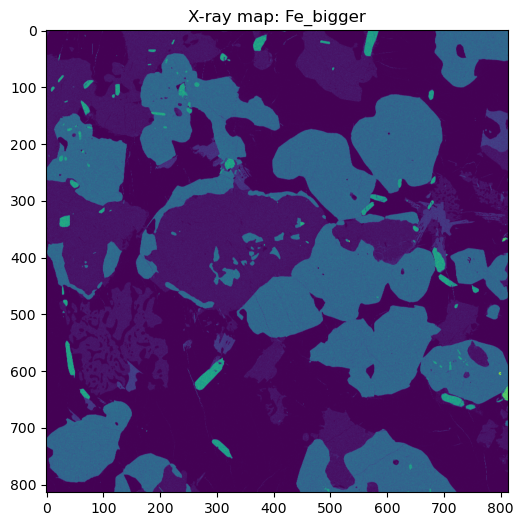

In [2]:
# loading maps with different sizes and domains

al_map = XrayMap("Al")
fe_normal = XrayMap("Fe")
fe_bigger = XrayMap("Fe_bigger")
fe_bigger.show_map()

In [3]:
fe_normal.dimensions

(342, 258)

In [4]:
fe_bigger.dimensions

(814, 814)

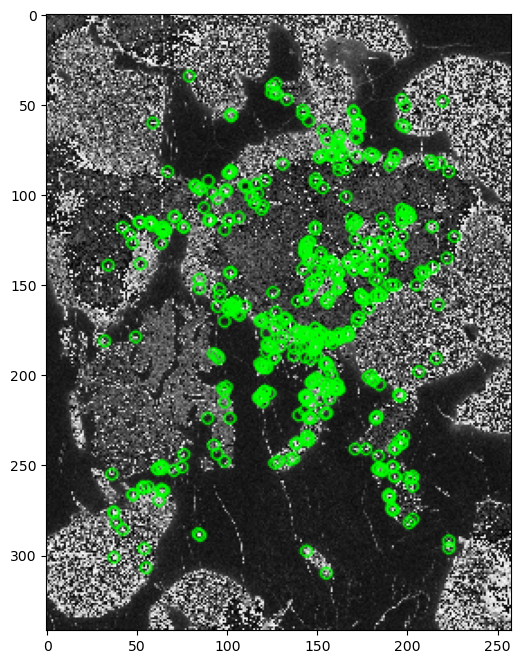

(<matplotlib.image.AxesImage at 0x7f6bd416f1d0>, None)

In [ ]:

# Load CSV into a NumPy array
data = np.loadtxt("data/Fe.csv", delimiter=",")   # or use np.genfromtxt

# Convert to uint8 (OpenCV expects image-like arrays)
data = data.astype(np.uint8)

# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(data,None)

# compute the descriptors with ORB
kp, des = orb.compute(data, kp)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(data, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [6]:
# test of descriptor matcher

MAX_FEATURES = 100
GOOD_MATCH_PERCENT = 0.05

orb = cv2.ORB_create(MAX_FEATURES)

# Convert images to grayscale

# im1Gray = cv2.cvtColor(np.uint8(al_map.data), cv2.COLOR_BGR2GRAY)
# im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

keypoints1, descriptors1 = orb.detectAndCompute(np.uint8(al_map.xray_data_scaled), None)
keypoints2, descriptors2 = orb.detectAndCompute(np.uint8(fe_normal.xray_data_scaled), None)

# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

# Sort matches by score
matches = list(matches)
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:numGoodMatches]

# Draw top matches
imMatches = cv2.drawMatches(np.uint8(al_map.xray_data_scaled), keypoints1, np.uint8(fe_normal.xray_data_scaled), keypoints2, matches, None)
cv2.imwrite("matches.jpg", imMatches)

True

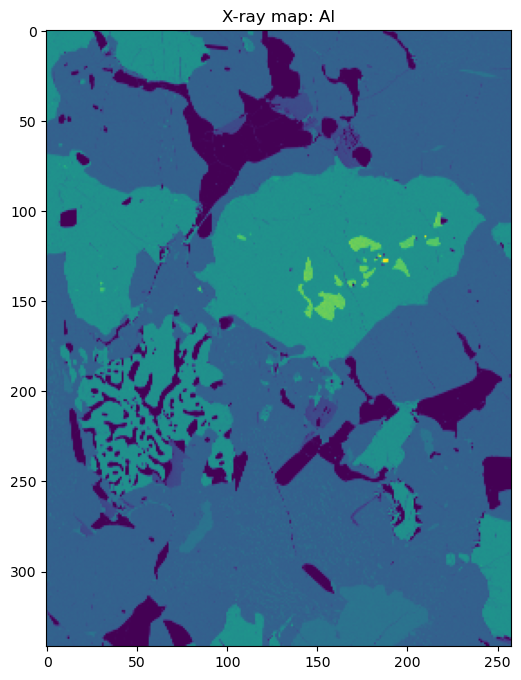

In [9]:
al_map.show_map()